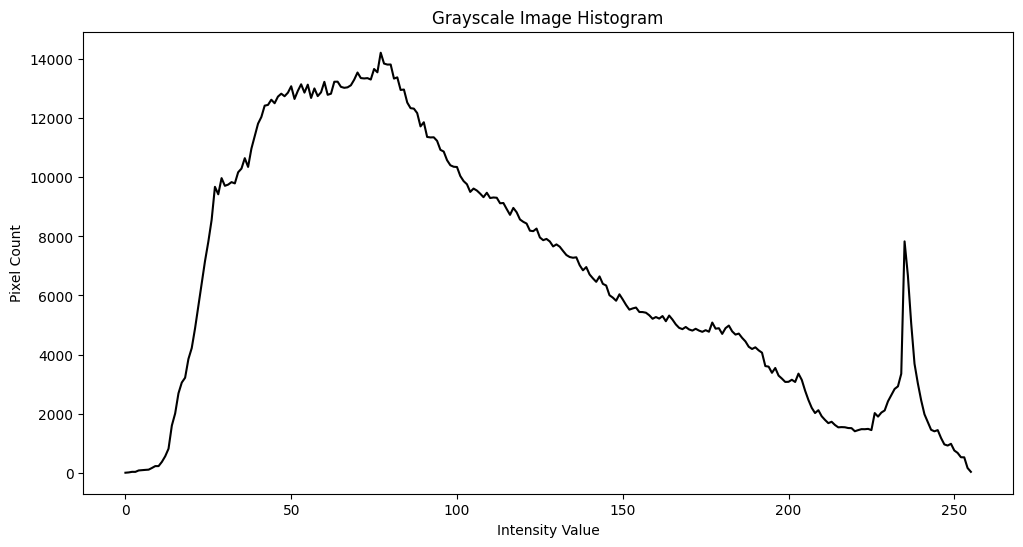

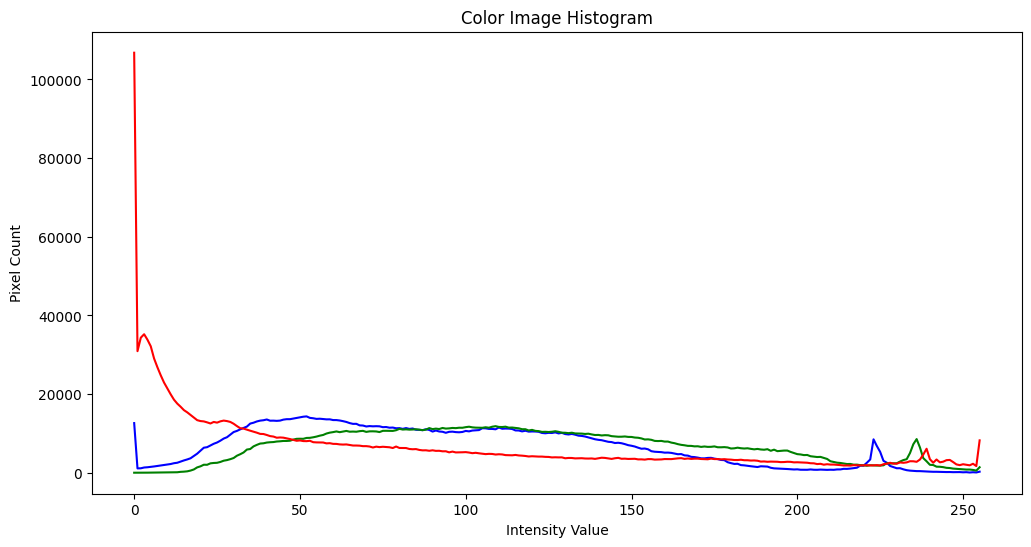

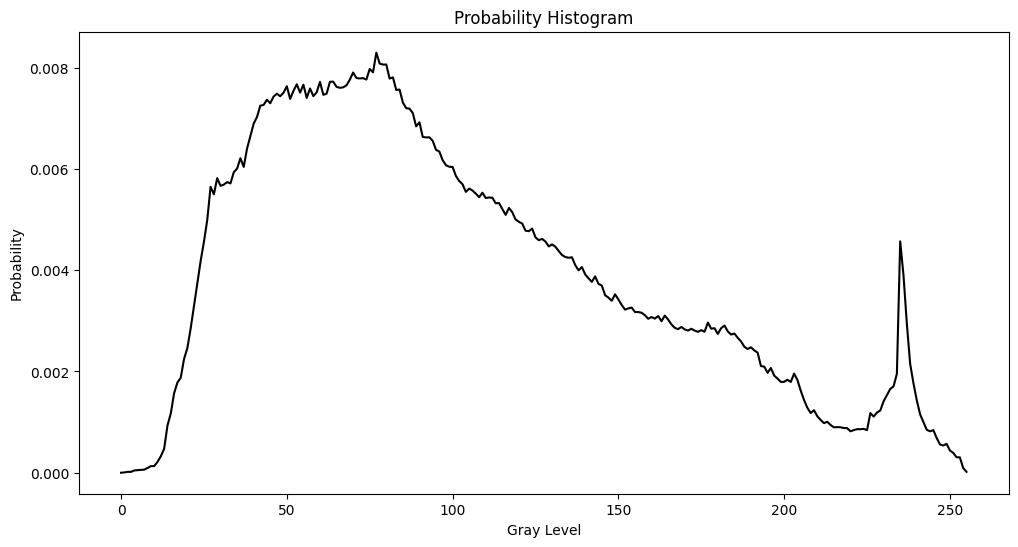

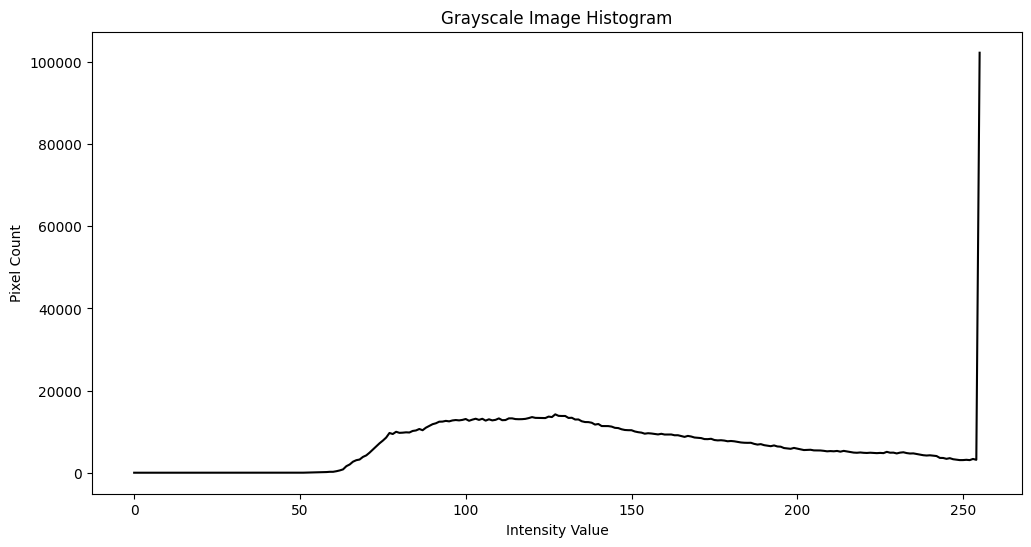

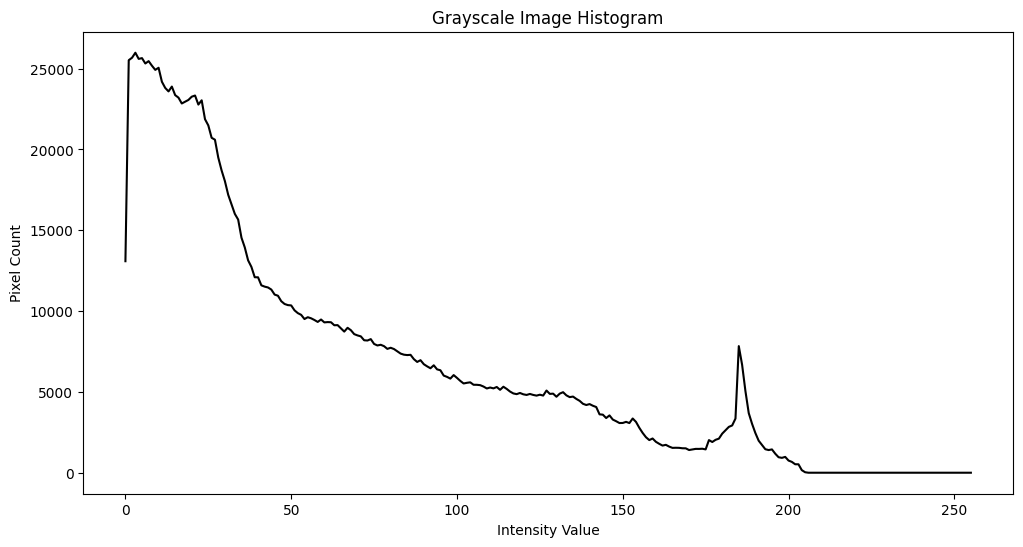

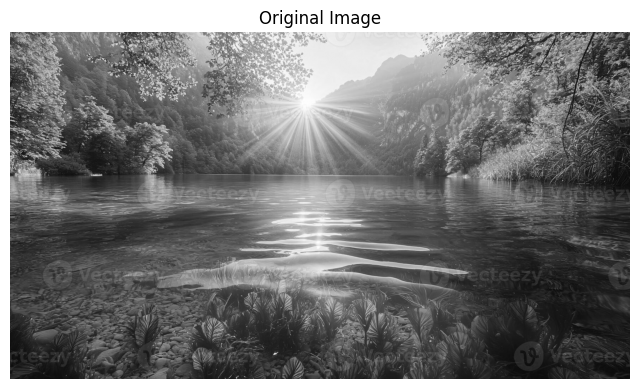

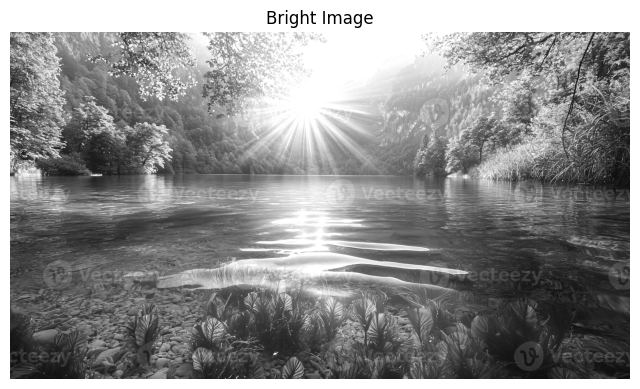

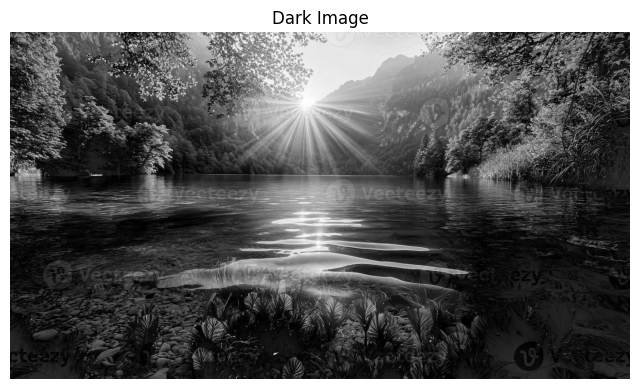

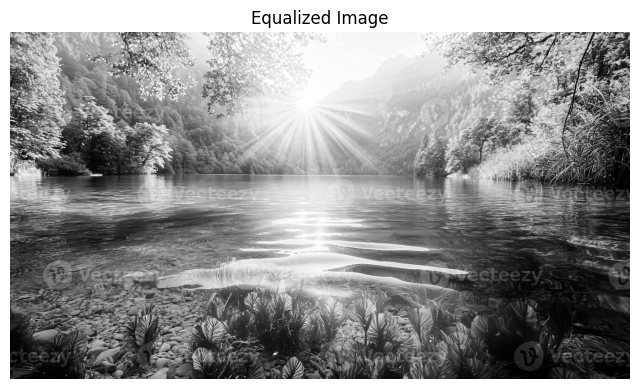

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image, color=False):
    """
    Computes and displays histograms for grayscale and color images.
    """
    plt.figure(figsize=(12, 6))
    if color:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title("Color Image Histogram")
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
        plt.title("Grayscale Image Histogram")

    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count")
    plt.show()

def compute_probability_histogram(image):
    """
    Computes and displays the probability histogram for grayscale images.
    """
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist /= hist.sum()  # Normalize to probability
    plt.figure(figsize=(12, 6))
    plt.plot(hist, color='black')
    plt.title("Probability Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Probability")
    plt.show()

def adjust_brightness(image, value):
    """
    Adjusts the brightness of an image.
    """
    return cv2.convertScaleAbs(image, alpha=1, beta=value)

def histogram_equalization(image):
    """
    Enhances contrast using histogram equalization.
    """
    return cv2.equalizeHist(image)

def display_image_colab(title, image, cmap_type='gray'):
    """
    Displays an image using Matplotlib (for Google Colab).
    """
    plt.figure(figsize=(8, 8))
    if len(image.shape) == 2:  # Grayscale
        plt.imshow(image, cmap=cmap_type)
    else:  # Color (BGR to RGB)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.title(title)
    plt.axis("off")
    plt.show()

def main():
    # Load color image
    #from google.colab import files
    #uploaded = files.upload()  # Upload an image manually in Colab

    #for filename in uploaded.keys():
    image = cv2.imread("test.jpg")
     #   break  # Process only the first uploaded image

    if image is None:
        print("Error: Image not found.")
        return

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("gray_image.jpg", gray_image)

    # Compute and display histograms
    compute_histogram(gray_image, color=False)
    compute_histogram(image, color=True)

    # Compute probability histogram for grayscale
    compute_probability_histogram(gray_image)

    # Create bright and dark images
    bright_image = adjust_brightness(gray_image, 50)
    dark_image = adjust_brightness(gray_image, -50)

    # Show histograms for bright and dark images
    compute_histogram(bright_image, color=False)
    compute_histogram(dark_image, color=False)

    # Apply histogram equalization
    equalized_image = histogram_equalization(gray_image)

    # Display images inline in Colab
    display_image_colab("Original Image", gray_image)
    display_image_colab("Bright Image", bright_image)
    display_image_colab("Dark Image", dark_image)
    display_image_colab("Equalized Image", equalized_image)

if __name__ == "__main__":
    main()


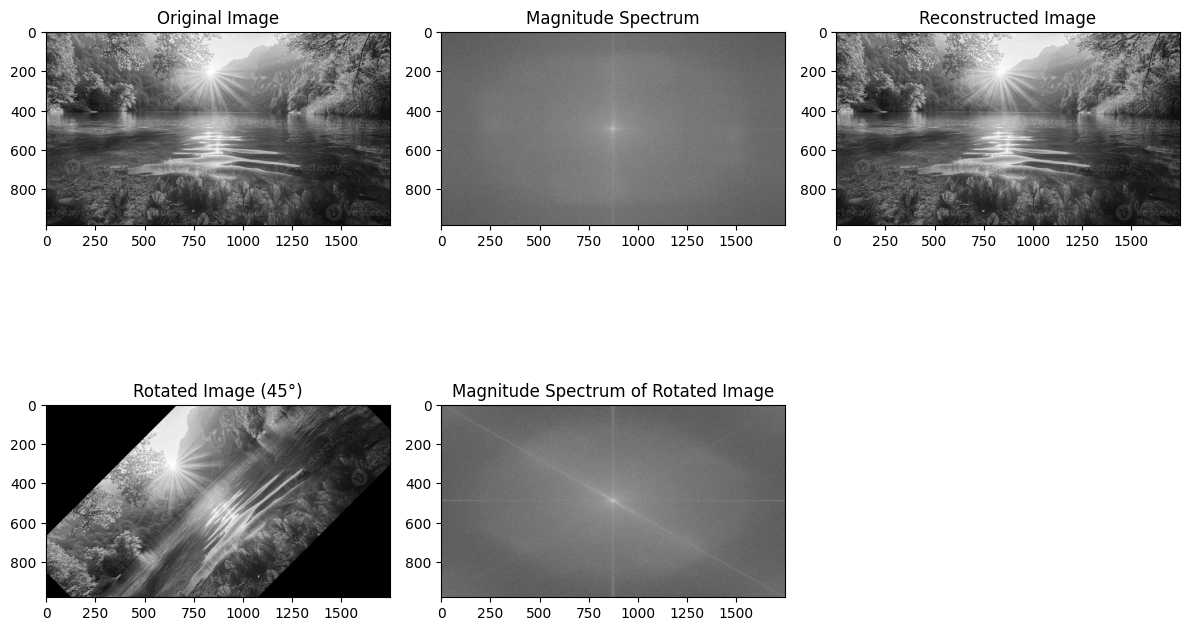

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return fshift, magnitude_spectrum

def compute_ifft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Load a grayscale image
image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Compute FFT and magnitude spectrum
fshift, magnitude_spectrum = compute_fft(image)

# Compute IFFT to reconstruct image
img_reconstructed = compute_ifft(fshift)

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)

# Compute FFT of rotated image
fshift_rot, magnitude_spectrum_rot = compute_fft(rotated_image)

# Display results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(img_reconstructed, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Rotated Image (45°)")
plt.imshow(rotated_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Magnitude Spectrum of Rotated Image")
plt.imshow(magnitude_spectrum_rot, cmap='gray')

plt.tight_layout()
plt.show()
